# Section Two 
## Implementation of K-Means Clusterring 

In [1]:
import numpy as np 
from matplotlib import pyplot as plt

In [2]:
from sklearn.datasets import load_iris
data = load_iris()['data'] 

In [3]:
def euclidean (pOne, centroids) : 
  dist = []
  for i in range(len(centroids)) :
    dist.append(np.dot(np.subtract(pOne, centroids[i]), np.subtract(pOne, centroids[i])))
  return dist 


def costFunction (labels, points, k, centroids) : 
  cost = 0
  for i in range(k) : 
    if  i in labels :
      cluster = points[np.where(np.asarray(labels) == i)[0]]
      cost += np.sum(np.power(np.subtract(cluster, centroids[i]), 2))
  return cost

def setCentroid (points, labels, k) : 
  cent = []
  labels = np.asarray(labels)
  for i in range(k) :
    if  i in labels :
      cluster = points[np.where(labels == i)[0]]
      cent.append(np.mean(cluster, axis = 0))
    else :
      cent.append(np.zeros((1,4))[0])
  return cent

def kMeans (points, k, ifCost) : 
  initialCentroidsIdx = np.random.randint(0, len(points), k) 
  centroids = points[initialCentroidsIdx]
  cost = []
  rounds = 0
  ifConverge = False 
  while not(ifConverge) :
    labels = []
    rounds += 1
    for i in range(len(points)) :
      dists = euclidean (points[i], centroids)
      labels.append(np.argmin(dists))
    tempCentroids = np.array(centroids) 
    centroids = np.array(setCentroid(points, labels, k))
    if ifCost : 
      cost.append(costFunction(labels, points, k, centroids))
    if (tempCentroids == centroids).all() : 
      ifConverge = True
  if ifCost :
    return labels, cost
  else :
    return labels, centroids


Text(0.5, 1.0, 'Cost function per number of changes in the centroids ')

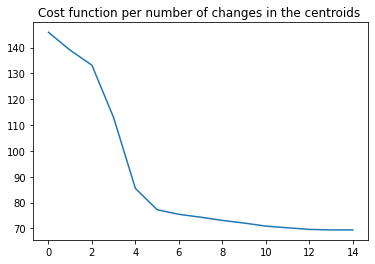

In [4]:
# Single run
result = kMeans(data, 5, 1)
cost = result[1]
plt.plot(range(len(cost)), cost)
plt.title('Cost function per number of changes in the centroids ')

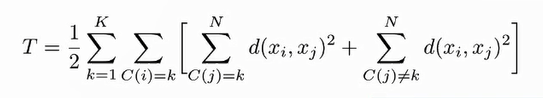

In [5]:
def withinSumOfSquares (labels, points, k) : 
  dist = 0
  for i in range(k) : 
    if  i in labels :
      cluster = points[np.where(np.asarray(labels) == i)[0]]
      for j in range(len(cluster)) : 
        dist += np.sum(np.power(np.subtract(cluster, cluster[j]), 2))
  return dist

varience of the cost at k = 5 is 559.6830307563881 and the mean is 61.884897496066976
varience of the cost at k = 10 is 42.66470748978232 and the mean is 33.36427726937466
varience of the cost at k = 20 is 8.632983944162541 and the mean is 20.288059893966878


Text(0.5, 1.0, 'Cost amount per iteration for k = 20')

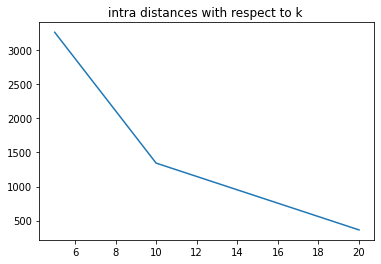

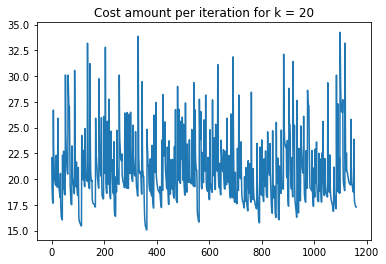

In [6]:
# Different values of k with 150 itterations 

# Setting k to 5 
dists = []
k = 5
cost = np.zeros(1)
for  i in range(150) : 
  result = kMeans(data, k, 1)
  labels = result[0]
  cost = np.append(cost, np.array(result[1]), axis = 0)
var = np.std(cost[1: len(cost) -1 ]) **2 
mean = sum(cost)/ (len(cost) -1) 
print(f'varience of the cost at k = {k} is {var} and the mean is {mean}')
dists.append(withinSumOfSquares(labels, data, k))


# Setting k to 10
k = 10 
cost = np.zeros(0)

for  i in range(150) : 
  result = kMeans(data, k, 1)
  labels = result[0]
  cost = np.append(cost, np.array(result[1]), axis = 0)
var = np.std(cost[1: len(cost)-1 ]) **2 
mean = sum(cost)/ (len(cost) -1) 
print(f'varience of the cost at k = {k} is {var} and the mean is {mean}')
dists.append(withinSumOfSquares(labels, data, k))

# Setting K to 20 
k = 20 
cost = np.zeros(1)
for  i in range(150) : 
  result = kMeans(data, k, 1)
  labels = result[0]
  cost = np.append(cost, np.array(result[1]), axis = 0)
var = np.std(cost[1: len(cost)-1 ]) **2 
mean = sum(cost)/ (len(cost) -1) 
print(f'varience of the cost at k = {k} is {var} and the mean is {mean}')
dists.append(withinSumOfSquares(labels, data, k))
# Plot of the intera distances for different number of K 
plt.plot([5, 10, 20], dists)
plt.title('intra distances with respect to k ')

figure, ax = plt.subplots(1)
ax.plot(range(len(cost)-1 ), cost[1: len(cost)])
ax.set_title(f'Cost amount per iteration for k = {k}')